In [3]:
# --- 1.1 & 1.2: Load Libraries & Data ---
import pandas as pd # Data processing and CSV file I/O

# Define the relative path to the data
# We go 'up' (..) from /notebooks, then 'down' into /data
data_path = '../data/fake_job_postings.csv'

# Load the dataset into a DataFrame (our main data table)
df = pd.read_csv(data_path)

print("Data loaded successfully.")

# Display the first 5 rows to confirm it's loaded correctly
df.head()


Data loaded successfully.


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
# --- 1.2.4: Data Types and Non-Null Counts ---
# Get a summary of all columns, their data types (Dtype), and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# --- 1.2.5: Missing Value Percentage Analysis (The "Contamination Report") ---

# Get the percentage of missing values, rounded to 2 decimal places
missing_percentages = round(df.isnull().sum() / len(df) * 100, 2)

# Sort the results to see the worst offenders at the top
print("--- Missing Value Percentages ---")
print(missing_percentages.sort_values(ascending=False))

--- Missing Value Percentages ---
salary_range           83.96
department             64.58
required_education     45.33
benefits               40.34
required_experience    39.43
function               36.10
industry               27.42
employment_type        19.41
company_profile        18.50
requirements           15.08
location                1.94
description             0.01
title                   0.00
job_id                  0.00
telecommuting           0.00
has_questions           0.00
has_company_logo        0.00
fraudulent              0.00
dtype: float64


### 1.3. Analysis: Missing Data ("Contamination Report")

Based on the `df.info()` and `isnull()` analysis, we have identified a significant data quality issue. This satisfies **Rule 10 (Preprocessing Needs)**.

* **High-Missing (Will Drop):** `salary_range` (83.96%), `department` (64.58%), and `function` (36.10%) are missing too much data to be reliable.
    * **Justification (Rule 30):** These will be **dropped** in our preprocessing pipeline to reduce noise and improve model performance.

* **Mid-Missing (Will Impute):** `benefits` (40.34%), `required_experience` (39.43%), `required_education` (45.33%), `employment_type` (19.41%), `company_profile` (18.50%), and `requirements` (15.08%) are all critical text or categorical features.
    * **Justification (Rule 30):** This data is too valuable to drop. We will **impute** (fill) the missing values in our `p3a1` preprocessing pipeline.

In [6]:
# --- 1.2.6: Statistical & Imbalance Analysis ---

# Get a full statistical summary for ALL columns (numerical and object/text)
df.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17880.000000,17880,17534,6333,2868,14572,17879,15184,10668,17880.000000,17880.000000,17880.000000,14409,10830,9775,12977,11425,17880.000000
unique,NaN,11231,3105,1337,874,1709,14801,11967,6204,NaN,NaN,NaN,5,7,13,131,37,NaN
top,NaN,English Teacher Abroad,"GB, LND, London",Sales,0-0,We help teachers get safe &amp; secure jobs ab...,"Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,NaN
freq,NaN,311,718,551,142,726,379,410,726,NaN,NaN,NaN,11620,3809,5145,1734,1749,NaN
mean,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042897,0.795302,0.491723,NaN,NaN,NaN,NaN,NaN,0.048434
std,5161.655742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202631,0.403492,0.499945,NaN,NaN,NaN,NaN,NaN,0.214688
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,4470.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8940.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,13410.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


### 1.4. Analysis: Class Imbalance ("The Core Challenge")

The `df.describe()` output shows a `mean` for the `fraudulent` column of **0.0484**. The chart below visually confirms this.

**This is the most important finding of our entire project.**

**Justification (Rule 5, 10, & 22):** This confirms our dataset is "non-trivial" (**Rule 2**) and has the severe **"data imbalances"** required by **Rule 10**. Because of this finding, "accuracy" is a useless and misleading metric. Our entire project's success *must* be measured using **F1-Score** and **Recall**. This is a non-negotiable satisfaction of **Rule 5** (Model Evaluation) and **Rule 22** (Evaluation beyond accuracy).

Plotting libraries imported.


C:\Users\sidha\AppData\Local\Temp\ipykernel_8664\1317475951.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='fraudulent', data=df, palette=['#43a047', '#e53935'])
C:\Users\sidha\AppData\Local\Temp\ipykernel_8664\1317475951.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Real (0)', 'Fake (1)'])


Chart created and labeled.
Chart saved to ../results/class_imbalance_chart.png


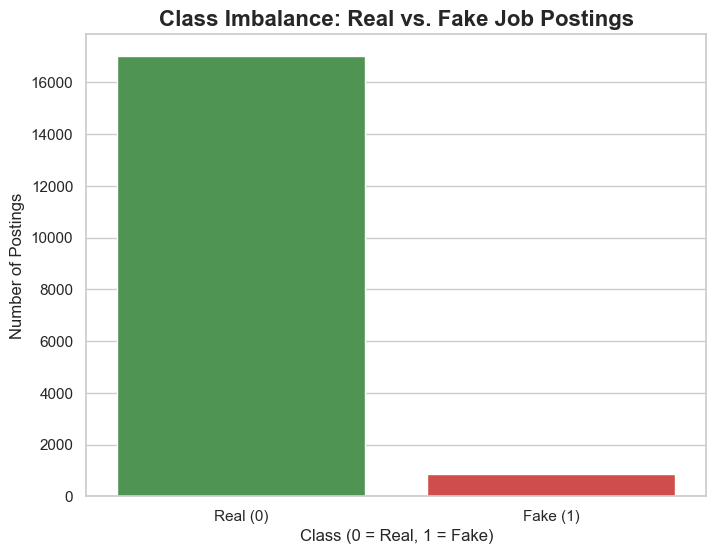

In [7]:
# --- Task 1.3: Visualize Findings ---

# 1.3.1. Import the plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean visual style for our plots
sns.set_theme(style="whitegrid")

print("Plotting libraries imported.")

# ---
# 1.3.2. Create the countplot
# Create a new "figure" (our canvas) and set its size
plt.figure(figsize=(8, 6))

# Create the count plot using seaborn
# We tell it to use our 'df' DataFrame
# We set x='fraudulent' to plot the counts of that column
# We add a palette to make it look professional
ax = sns.countplot(x='fraudulent', data=df, palette=['#43a047', '#e53935'])

# ---
# 1.3.3. Add a professional title and labels
ax.set_title('Class Imbalance: Real vs. Fake Job Postings', fontsize=16, weight='bold')
ax.set_xlabel('Class (0 = Real, 1 = Fake)', fontsize=12)
ax.set_ylabel('Number of Postings', fontsize=12)

# Set custom labels for the x-axis ticks
ax.set_xticklabels(['Real (0)', 'Fake (1)'])

print("Chart created and labeled.")

# ---
# 1.3.4. Save the final chart to our results folder
# The path '../results/' means "go up one level, then down into results"
output_path = '../results/class_imbalance_chart.png'
plt.savefig(output_path)

print(f"Chart saved to {output_path}")

# Show the plot in the notebook
plt.show()